In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
path_pre = '.\Data\Preparation\Kennzahlen_aller_Gemeinden\\'

In [112]:
file_name='Alle_Daten'
df_new = pd.read_excel(path_pre+file_name+'.xlsx', 
                   header=[0,1], 
                   index_col=[0,1])
file_name='merged_typologien'
df_old = pd.read_excel('.\Data\Preparation\\'+file_name+'.xlsx')

In [135]:

#cols = ['GDEBZNA','Gemeindename','Ständige Wohnbevölkerung Bevölkerungs-dichte1 in Pers./km2']
cols = ['Siedlungsfläche_in_%', 'Landwirtschafts-fläche_in_%','Betriebe_total,Wohnungen - Total','Anzahl_Privathaushalte','Gemeindename','Ständige Wohnbevölkerung Bevölkerungs-dichte1 in Pers./km2','Gemeindetypologien']
cols_new  = ['Gemeindename','Ständige Wohnbevölkerung Bevölkerungs-dichte1 in Pers./km2','Gemeindetypologien']
cols_old = ['Jahr','Gemeindename','Ständige Wohnbevölkerung Bevölkerungs-dichte1 in Pers./km2','Gemeindetypologien']



def filter_by_titles(df, titles,level):
    # Create a mask for the desired subtitles for all columns in the DataFrame
    column_mask = df.columns.isin(titles, level=level)
    # Use the mask to filter the columns of the DataFrame
    filtered_df = df.loc[:, column_mask]
    return filtered_df

def filter_by_titles_or_subtitel(df,titles=[],subtitles=[],multheader =True):
        df_t = filter_by_titles(df,titles,0)
        df_s = filter_by_titles(df,subtitles,1)
        filtered_df =  pd.merge(df_t, df_s, left_index=True, right_index=True)
        if multheader:
            return filtered_df
        return filtered_df.droplevel(0, axis=1)
        

df_s = filter_by_titles_or_subtitel(df_new,subtitles=cols_new,multheader=False)
df_s = df_s.reset_index()
df_s = df_s.drop_duplicates(subset=['Gemeindecode' ,'Jahr'])



In [138]:
df_s.head(2)

,Gemeindecode,Jahr,Gemeindename,Ständige Wohnbevölkerung Bevölkerungs-dichte1 in Pers./km2,Gemeindetypologien
0,1001,1991,Doppleschwand,82.8,Land
1,1001,1992,Doppleschwand,85.8,Land


In [140]:
df_old.head(2)

,Gemeindename,Gemeinde ID,Mittlere Wohnbevölkerung,Ständige Wohnbevölkerung Total,Ständige Wohnbevölkerung Ausländer-anteil in %,Ständige Wohnbevölkerung Bevölkerungs-dichte1 in Pers./km2,Ständige Wohnbevölkerung Anteil 0-19-Jährige in %,Ständige Wohnbevölkerung Anteil 20-64-Jährige in %,Ständige Wohnbevölkerung Anteil 65-Jährige und Ältere in %,Jahr,Gemeindetypologien
1,Adligenswil,1051.0,4330,4356,6.6,623.2,34.6,61.8,3.6,1991,Agglokern
2,Aesch,1021.0,896,912,6.6,157.2,29.5,61.3,9.2,1991,Land


C:\Users\LUKAS~1.LOU\AppData\Local\Temp/ipykernel_23500/299402388.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


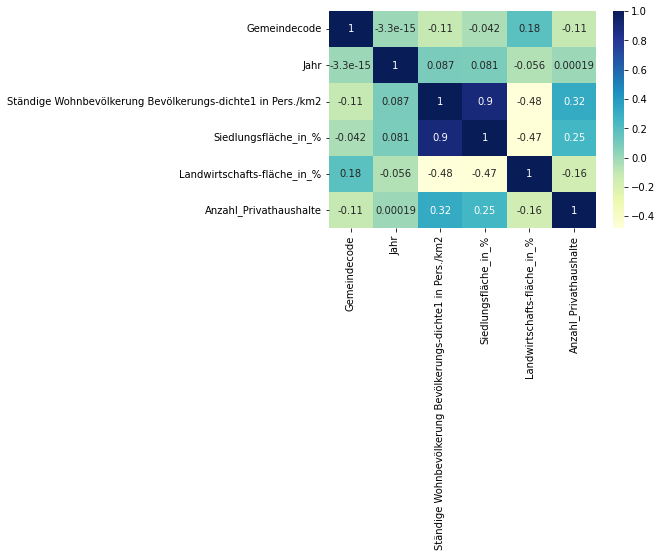

In [106]:
def plot_corr_matrix(df):
    corr_matrix = df.corr()
    #style_plt(f'corr_matrix')
    sns.heatmap(corr_matrix, annot=True, cmap="YlGnBu")
    plt.show()
plot_corr_matrix(df_s)

In [98]:
import pandas as pd
from sklearn.feature_selection import chi2, f_classif
from sklearn.feature_selection import SelectKBest, mutual_info_classif


class FeatureSelector:
    def __init__(self, data, target):
        self.data = data
        self.target = target

    def pearson_corr(self, threshold=0.5):
        corr_matrix = self.data.corr()
        relevant_features = corr_matrix.index[abs(corr_matrix[self.target]) >= threshold]
        return relevant_features.tolist()

    def chi2_test(self, k=10):
        selector = SelectKBest(chi2, k=k)
        selector.fit(self.data, self.target)
        relevant_features = self.data.columns[selector.get_support()]
        return relevant_features.tolist()

    def f_test(self, k=10):
        selector = SelectKBest(f_classif, k=k)
        selector.fit(self.data, self.target)
        relevant_features = self.data.columns[selector.get_support()]
        return relevant_features.tolist()

    def mutual_info(self, k=10):
        selector = SelectKBest(mutual_info_classif, k=k)
        selector.fit(self.data, self.target)
        relevant_features = self.data.columns[selector.get_support()]
        return relevant_features.tolist()

In [99]:
#df_s = pd.get_dummies(df_s, columns=['Gemeindetypologien','Gemeindename'])

X = df_s.drop('Ständige Wohnbevölkerung Bevölkerungs-dichte1 in Pers./km2', axis=1)
Y = df_s['Ständige Wohnbevölkerung Bevölkerungs-dichte1 in Pers./km2']


In [104]:
fsel = FeatureSelector(df_s,'Ständige Wohnbevölkerung Bevölkerungs-dichte1 in Pers./km2')
fsel.f_test()

ValueError: could not convert string to float: 'Doppleschwand'